# ASSIGNMENT 30

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition 
from sklearn.decomposition import PCA
from sklearn import datasets

In [2]:
# Loading the data
iris_data = datasets.load_iris()
iris = iris_data.data

In [3]:
# Normalising the data
from sklearn.preprocessing import StandardScaler
iris = StandardScaler().fit_transform(iris)

In [4]:
# Applying PCA on Iris data using 3 components
pca = PCA(n_components=3) 
pca.fit(iris) 

print("Principal components:")
print(pca.components_)

print("---")
print("Compressed - 4D to 3D:")
print(pca.transform(iris)[:5,:]) # first 5 obs


Principal components:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]]
---
Compressed - 4D to 3D:
[[-2.26470281  0.4800266  -0.12770602]
 [-2.08096115 -0.67413356 -0.23460885]
 [-2.36422905 -0.34190802  0.04420148]
 [-2.29938422 -0.59739451  0.09129011]
 [-2.38984217  0.64683538  0.0157382 ]]


In [5]:
# Creating a DataFrame using the Principal Components
principalComponents = pca.fit_transform(iris)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])

In [6]:
# Visualising the dataframe
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


In [7]:
# Creating a Target dataframe and merging it with Iris dataframe
targetDf = pd.DataFrame(data=iris_data.target,columns = ['target'])
finalDf = pd.concat([principalDf,targetDf ], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,target
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0
3,-2.299384,-0.597395,0.091290,0
4,-2.389842,0.646835,0.015738,0


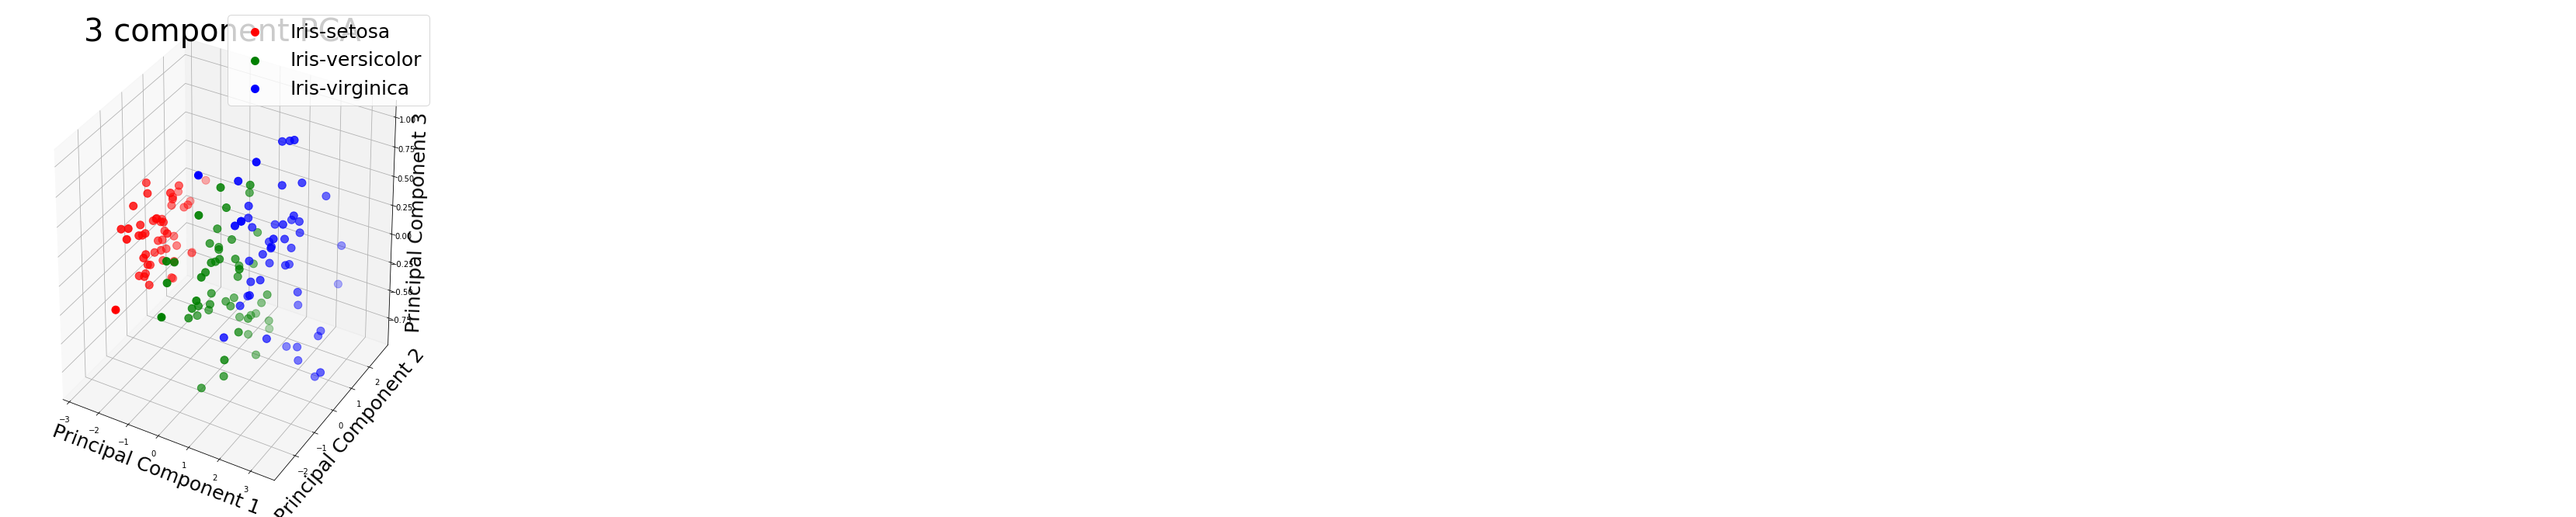

In [8]:
# Visualising the 3D plot 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,12))
ax = fig.add_subplot(1,1,1,projection='3d') 

ax.set_xlabel('Principal Component 1', fontsize = 25)
ax.set_ylabel('Principal Component 2', fontsize = 25)
ax.set_zlabel('Principal Component 3', fontsize = 25)

ax.set_title('3 component PCA', fontsize =40)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],finalDf.loc[indicesToKeep, 'principal component 2'],finalDf.loc[indicesToKeep,'principal component 3']
               , c = color
               , s = 100)
target = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
ax.legend(target,fontsize = 25)
ax.grid()